In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
df_heart = pd.read_csv('cardio_train.csv', sep=';', index_col=0)
df_heart

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                             
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
99993  19240       2     168    76.0    120     80            1     1      1   
99995  22601       1     158   126.0    140     90            2     2      0   
99996  19066       2     183   105.0    180     90            3     1      0   
99998  22431       1     163    72.0    135     80            1     2      0   
99999  20540       1     170    72.0    120     80            2     1      0   

       alco  active  cardio  
id                           
0         0       1       0  
1         0       1       1  
2         0       0       1  
3         0       1       1  
4         0       0       0  
...     ...     ...     ...  
99993     0       1       0  
99995     0       1       1  
99996     1       0       1  
99998     0       0       1  
99999     0       1       0  

[70000 rows x 12 columns]

### Explicação das Colunas
- age: Idade em dias
- gender: Gênero (1-mulher, 2- homem)
- height: Altura em cm
- weight: Peso em kg
- ap_hi: Pressão arterial sistólica
- ap_lo: Pressão arterial diastólica
- cholesterol: Colesterol (1: normal, 2: acima do normal, 3: muito acima do normal)
- gluc: Glicose (1: normal, 2: acima do normal, 3: muito acima do normal)
- smoke: Fumante (0: não, 1: sim)
- alco: Alcoólatra (0: não, 1: sim)
- active: Atividade física (0: não, 1: sim)
- cardio: Presença de doença cardíaca (0: não, 1: sim)

In [54]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [55]:
df_heart.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [56]:
df_heart.mean()

age            19468.865814
gender             1.349571
height           164.359229
weight            74.205690
ap_hi            128.817286
ap_lo             96.630414
cholesterol        1.366871
gluc               1.226457
smoke              0.088129
alco               0.053771
active             0.803729
cardio             0.499700
dtype: float64

### Análise Exploratória dos Dados

In [57]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [58]:
fig = make_subplots(rows=5, cols=1)
fig.add_trace(go.Box(x=df_heart['age'] / 365, name='Idade'), row=1, col=1)
fig.add_trace(go.Box(x=df_heart['weight'], name='Peso'), row=2, col=1)
fig.add_trace(go.Box(x=df_heart['height'], name='Altura'), row=3, col=1)
fig.add_trace(go.Box(x=df_heart['ap_hi'], name='Pressão arterial sistólica'), row=4, col=1)
fig.add_trace(go.Box(x=df_heart['ap_lo'], name='Pressão arterial diastólica'), row=5, col=1)

fig.update_layout(height=700)
fig.show()

In [59]:
fig2 = make_subplots(rows=2, cols=3)
fig2.add_trace(go.Bar(y=df_heart['gender'].value_counts(), x=['Feminino','Masculino'], name='Gênero'), row=1, col=1)
fig2.add_trace(go.Bar(y=df_heart['cholesterol'].value_counts(), x=['Normal','Acima do Normal','Muito Acima do Normal'], name='Colesterol'), row=1, col=2)
fig2.add_trace(go.Bar(y=df_heart['gluc'].value_counts(), x=['Normal','Acima do Normal','Muito Acima do Normal'], name='Glicose'), row=1, col=3)
fig2.add_trace(go.Bar(y=df_heart['smoke'].value_counts(), x=['Não Fumante', 'Fumante'], name='Fumante'), row=2, col=1)
fig2.add_trace(go.Bar(y=df_heart['alco'].value_counts(), x=['Não Alcoólatra', 'Alcoólatra'], name='Alcoólatra'), row=2, col=2)
fig2.add_trace(go.Bar(y=df_heart['active'].value_counts(), x=['Ativo Fisicamente', 'Não Ativo Fisicamente'], name='Atividade Física'), row=2, col=3)
fig2.update_layout(height=700)
fig2.show()

In [60]:
df_heart['cardio'].value_counts() / df_heart['cardio'].value_counts().sum()

0    0.5003
1    0.4997
Name: cardio, dtype: float64

<Axes: >

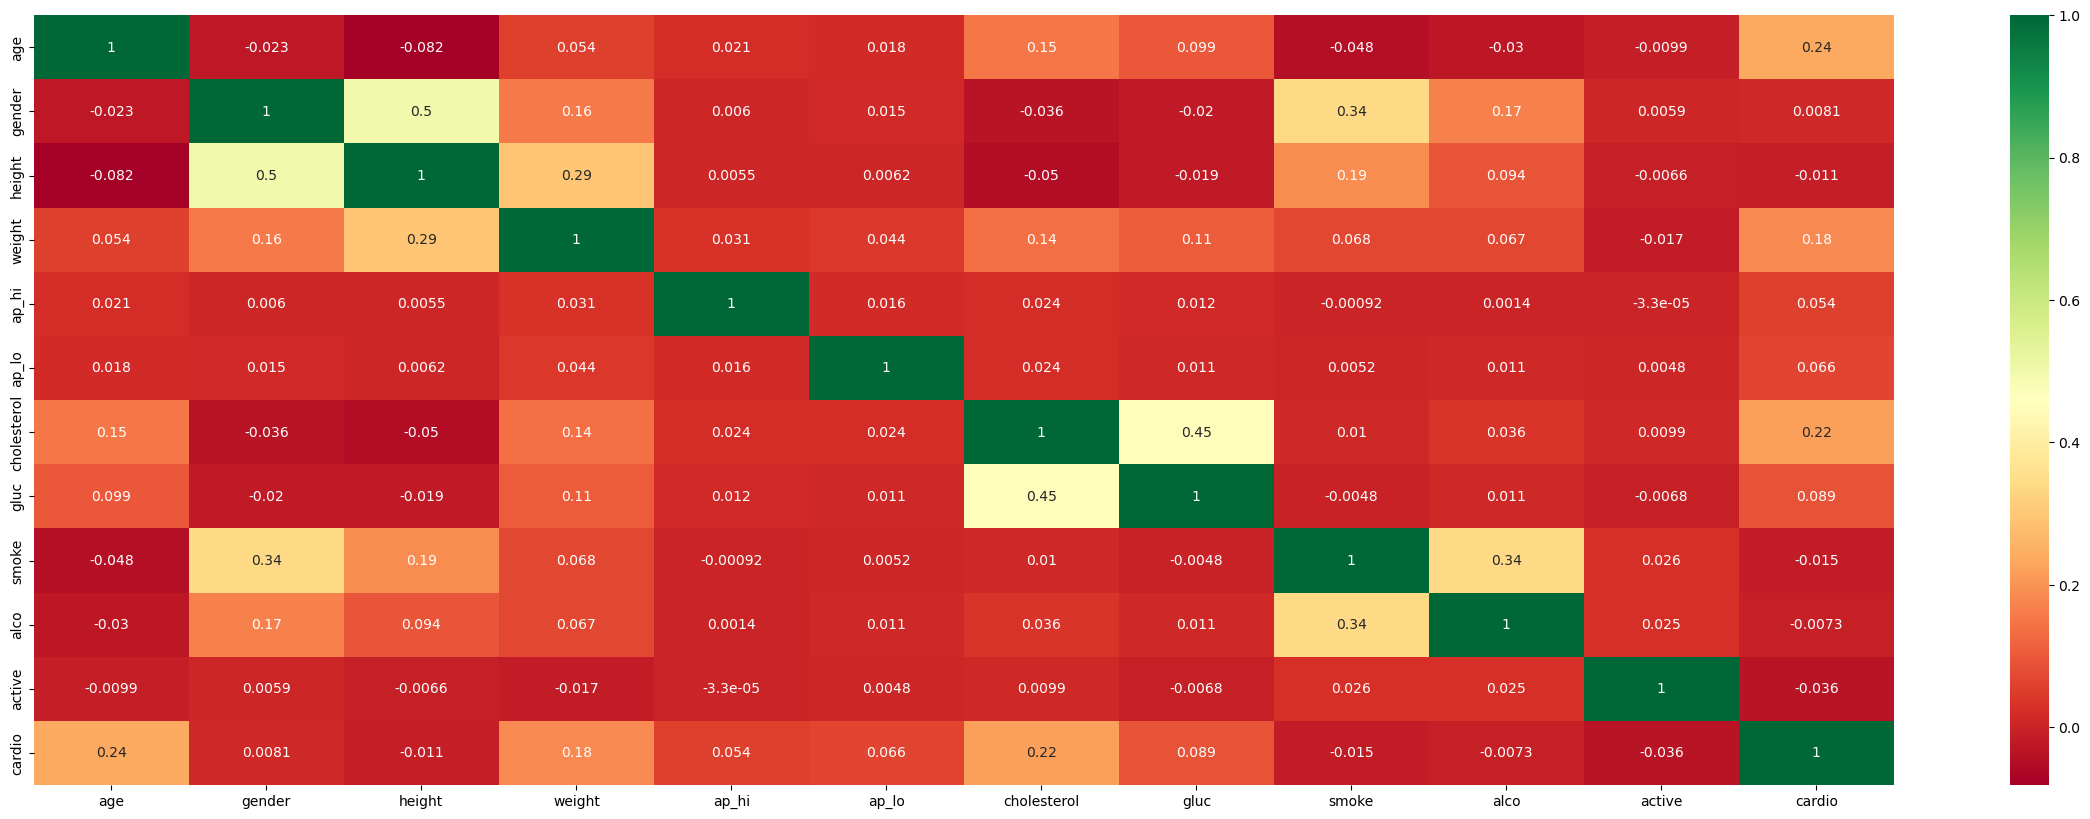

In [64]:
import seaborn as sns
fig3, ax = plt.subplots(figsize=(30,10))
sns.heatmap(df_heart.corr(), annot=True, cmap='RdYlGn')